In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\krishna\\AppData\\Local\\Temp\\Temp1_seattle-house-sales-prices.zip\\house_sales.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df1=pd.DataFrame(data=df,columns=('sqft_living','bedrooms','sqft_lot','floors','grade','sqft_above','sqft_basement','lat','sqft_living15','sqft_lot15','price'))
df1

,sqft_living,bedrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15,price
0,1180,3,5650,1.0,7,1180,0,47.5112,1340,5650,221900
1,2570,3,7242,2.0,7,2170,400,47.7210,1690,7639,538000
2,770,2,10000,1.0,6,770,0,47.7379,2720,8062,180000
3,1960,4,5000,1.0,7,1050,910,47.5208,1360,5000,604000
4,1680,3,8080,1.0,8,1680,0,47.6168,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,3,1131,3.0,8,1530,0,47.6993,1530,1509,360000
21609,2310,4,5813,2.0,8,2310,0,47.5107,1830,7200,400000
21610,1020,2,1350,2.0,7,1020,0,47.5944,1020,2007,402101
21611,1600,3,2388,2.0,8,1600,0,47.5345,1410,1287,400000


In [4]:
x=df1.iloc[:,:-1].values

In [5]:
y=df1.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
for k in [1,2,3]:
    KNN=KNeighborsRegressor(k)
    KNN.fit(x_train,y_train)
    pred=KNN.predict(x_test)
    print('predicted value for k =',k,'is',pred)

predicted value for k = 1 is [ 288000. 1035000.  475000. ...  850000.  248500.  438000.]
predicted value for k = 2 is [ 321450.5  887250.   436500.  ... 1117500.   274250.   442500. ]
predicted value for k = 3 is [333633.66666667 789333.33333333 544333.33333333 ... 878333.33333333
 309500.         391666.66666667]


In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import sqrt

In [15]:
rmse_value=[]

for k in range(20):
    k=k+1
    KNN=KNeighborsRegressor(k)
    KNN.fit(x_train,y_train)
    pred=KNN.predict(x_test)
    error=sqrt(mean_squared_error(y_test,pred))
    rmse_value.append(error)
    print('rmse value for k',k,'is',error)

rmse value for k 1 is 313043.0578153032
rmse value for k 2 is 278340.9700582159
rmse value for k 3 is 266353.5850738469
rmse value for k 4 is 265865.12872044486
rmse value for k 5 is 264050.3986058384
rmse value for k 6 is 261246.32275308573
rmse value for k 7 is 259543.88397342217
rmse value for k 8 is 259367.6914260692
rmse value for k 9 is 259139.63198116215
rmse value for k 10 is 259733.2970703872
rmse value for k 11 is 259871.95771460005
rmse value for k 12 is 260202.12768945747
rmse value for k 13 is 259832.3241442526
rmse value for k 14 is 260151.2226526867
rmse value for k 15 is 259196.43030648053
rmse value for k 16 is 258771.98114328345
rmse value for k 17 is 259121.2096166496
rmse value for k 18 is 259188.94845560205
rmse value for k 19 is 259614.72408268575
rmse value for k 20 is 260165.01980392274


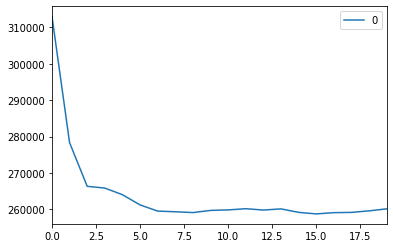

In [16]:
curve=pd.DataFrame(rmse_value)
curve.plot()
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(9)
KNR.fit(x_train,y_train)
pred=KNR.predict(x_test)
pred

array([369089.        , 898111.11111111, 463161.11111111, ...,
       796555.55555556, 298833.33333333, 349542.22222222])

In [20]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,pred)
accuracy=r2score*100
accuracy

49.44816802091048